# **Full Project**

## **Unsupervised Learning: Trade&Ahead**

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## **Importing Necessary Libraries**

In [ ]:
# Libraries to help with reading and manipulating data
!pip install matplotlib --upgrade

import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Data Overview**

- Observations
- Sanity checks

In [ ]:
stock = pd.read_csv('/content/stock_data.csv')
df = stock.copy()

In [ ]:
#First five rows of the data
df.head(5)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
#Random 5 row sample of the data
df.sample(n=5)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
320,WFC,Wells Fargo,Financials,Banks,54.360001,5.532912,0.969774,12,99,-460000000,22894000000,4.18,5.477033e+09,13.004785,-0.938007
326,WYN,Wyndham Worldwide,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",72.650002,1.000976,1.331918,64,9,-12000000,612000000,5.18,1.181467e+08,14.025097,-10.249967
13,AJG,Arthur J. Gallagher & Co.,Financials,Insurance Brokers,40.939999,-0.606943,1.052050,10,99,166000000,356800000,2.07,1.723671e+08,19.777777,-9.855706
138,GD,General Dynamics,Industrials,Aerospace & Defense,137.360001,-0.463767,0.939544,28,22,-1603000000,2965000000,9.23,3.212351e+08,14.881907,4.242998
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831


In [ ]:
#Checking the shape of the data
df.shape

(340, 15)

**Here we can see that the data has 15 columns and 340 rows.**

In [ ]:
#Checking the data types of the columns within the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**The data is divided up between 4 objects, 4 integers and 7 floats. We will be changing some the types later.**

In [ ]:
#Checking the data for duplicate values
df.duplicated().sum()

0

**There are no duplicate values in the data.**

In [ ]:
#Checking for nulls in the data
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**There are no null values in the data.**

In [ ]:
#Checking the numerical decription of the data
df.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


**We can see in the data that the numbers vary wildly confirming that we will definitely need to scale it before performing any other actions.**

In [ ]:
#Converting all columns with data type object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')
#Confirming data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS Sector                   340 non-null    category
 3   GICS Sub Industry             340 non-null    category
 4   Current Price                 340 non-null    float64 
 5   Price Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash Ratio                    340 non-null    int64   
 9   Net Cash Flow                 340 non-null    int64   
 10  Net Income                    340 non-null    int64   
 11  Earnings Per Share            340 non-null    float64 
 12  Estimated Shares Outstanding  340 non-null    floa

**Here we have converted our object data columns to categorical in order to make it more computationally efficient.**

In [ ]:
#Calculating a statistical summary of the data
df.describe(include='category').T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,3M Company,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


**We can see here that there are 340 separate companies, 11 different sectors in the data with Industrials being the most frequent and 104 sub industries Oil and Gas Exploration and Production being the most numerous of those containing 16 different companies.**

**Before we go any further, let's drop the Ticker Symbol name since it is not useful to the model and reconfirm our the shape and head of the data.**

In [ ]:
#Drop the ticker symbol column
df.drop("Ticker Symbol", axis=1, inplace=True)

In [ ]:
df.head()

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
df.shape

(340, 14)

**Above we can see that the data now has only 14 columns and the Ticker Symbol is no longer present in the head.**

## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Code to Create Plots and Visual Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### **Leading Questions**

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

**1. What does the distribution of stock prices look like?**

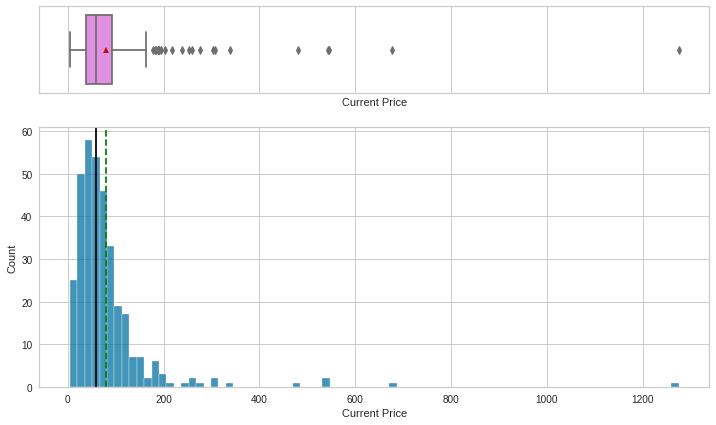

In [ ]:
histogram_boxplot(df, 'Current Price')

**The data skews very heavily right as most of the stocks are well below $100 per share but there are some pretty extreme outliers.** 

**2. The stocks of which economic sector have seen the maximum price increase on average?**


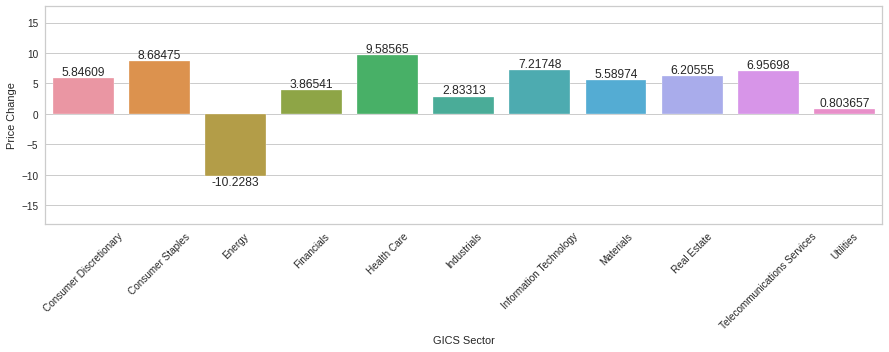

In [ ]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x='GICS Sector', y='Price Change',data=df,
                 errwidth=0)
plt.xticks(rotation=45) 

# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)


**Health Care, Consumer Staples and Information Technology have done the best while Energy has taken an absolute beating and is the only sector showing a negative number.**

**3. How are the different variables correlated with each other?**

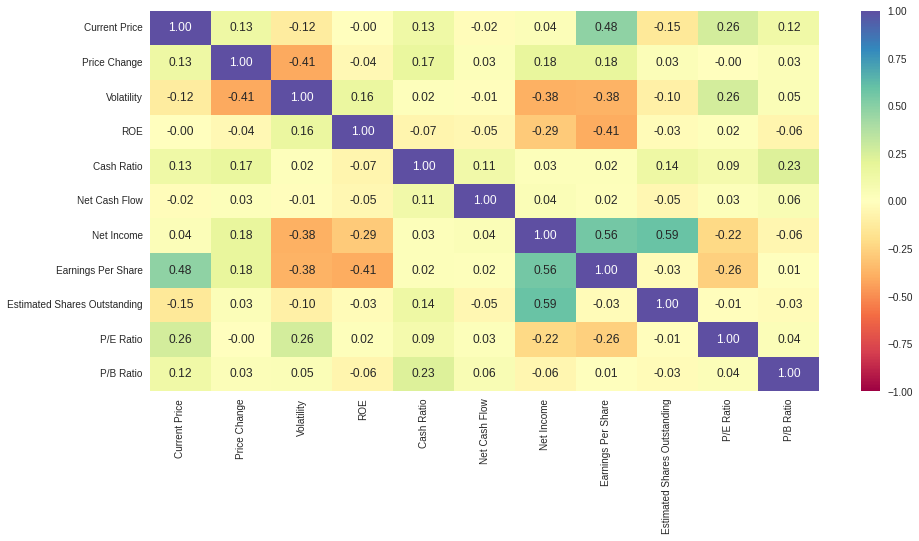

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**We see a lot of positive correlation between things like Earnings Per Share and Current Price which makes perfect sense. Earnings Per Share also does well with Net Income (another no brainer). Estimated Shares Outstanding is well correlated to Net Income, another logical one as popular stocks tend to be for companies that make money. On the negative side, we see ROE and Earnings Per Share which holds since companies that perform poorly aren't handing out large dividends. Volitility correlates negagtively with Price Change, Net Income, and Earnings Per Share. All of this makes sense given the standard deviation on price, the greater the negative impact to those otheer three metrics. Lots of good information here but no real surprises.**

**4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

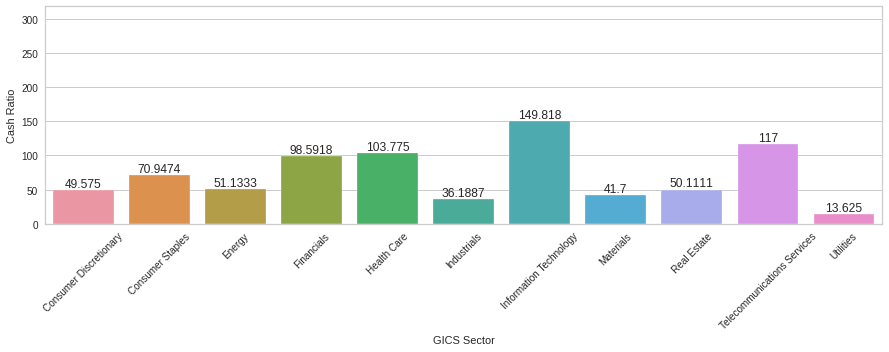

In [ ]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x='GICS Sector', y='Cash Ratio',data=df,
                 errwidth=0)
plt.xticks(rotation=45) 

# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)

**I.T., Telecom, Health Care and Financials all do well here and that is no surprise as they consistently bring in cash flow. Interesting that Energy seems able to weather its current storm with cash on hand. That sector is towards the middle of the pack despite performing so poorly in the price display above.**

**5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

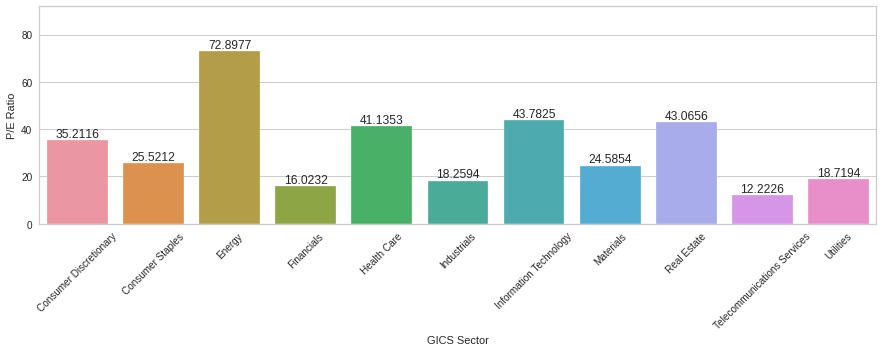

In [ ]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x='GICS Sector', y='P/E Ratio',data=df,
                 errwidth=0)
plt.xticks(rotation=45) 

# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)

**Energy, Health Care, I.T. and Real Estate all out perform the field here. All of them are essentials and will survive any temporary market fluctuations like what Energy has experienced lately.**

### **Additional Univariate Analysis**

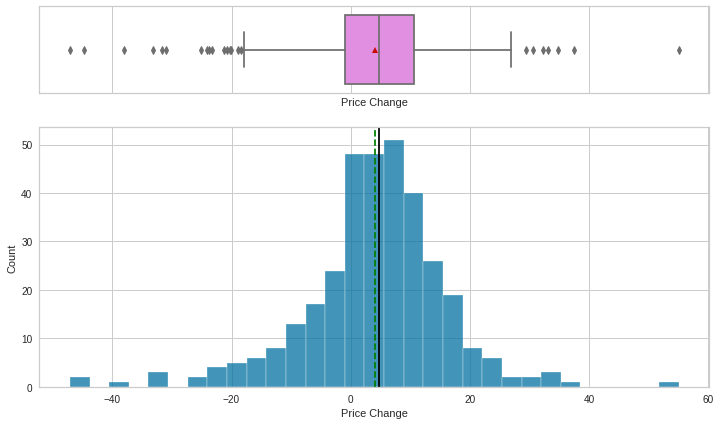

In [ ]:
histogram_boxplot(df, 'Price Change') 

**Distribution here is close to normal with the average just short of $5.**

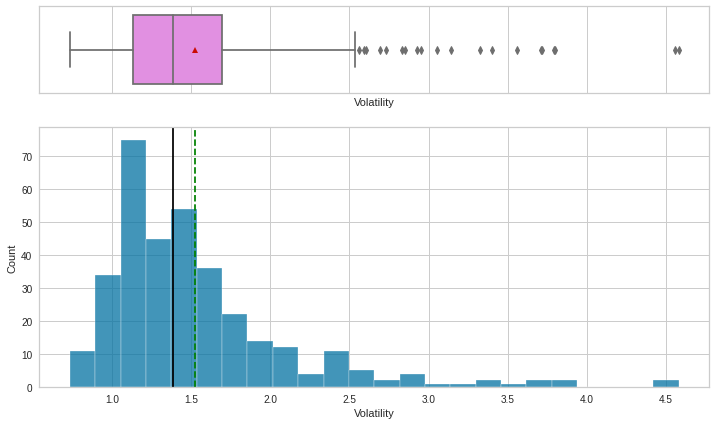

In [ ]:
histogram_boxplot(df, 'Volatility') 

**Heavily skewed right here with the average about 1.5 and the median 1.4**

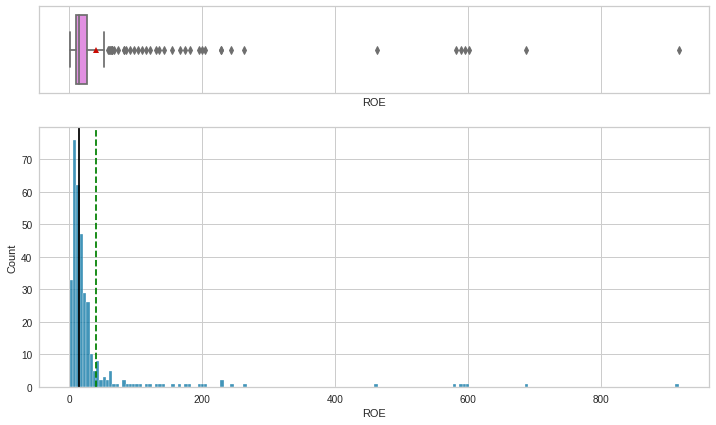

In [ ]:
histogram_boxplot(df, 'ROE') 

**ROE is skewed to the extreme right and made to look even moreso by the handful of heavy outliers one going so far as nearly 1000.** 

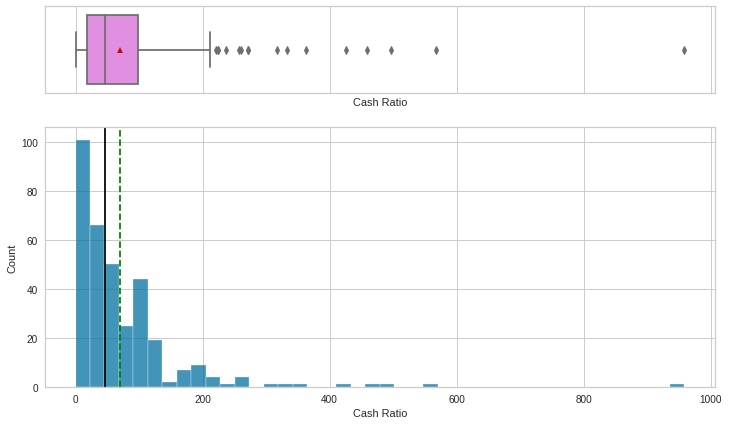

In [ ]:
histogram_boxplot(df, 'Cash Ratio') 

**Cash Ratio is also skewed right continuing the overall trend we are seeing of several positive outliers throwing off any chance of a normal distribution in the data.**

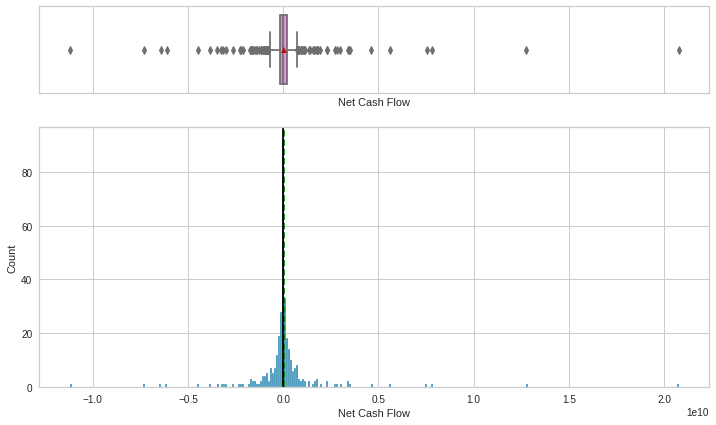

In [ ]:
histogram_boxplot(df, 'Net Cash Flow') 

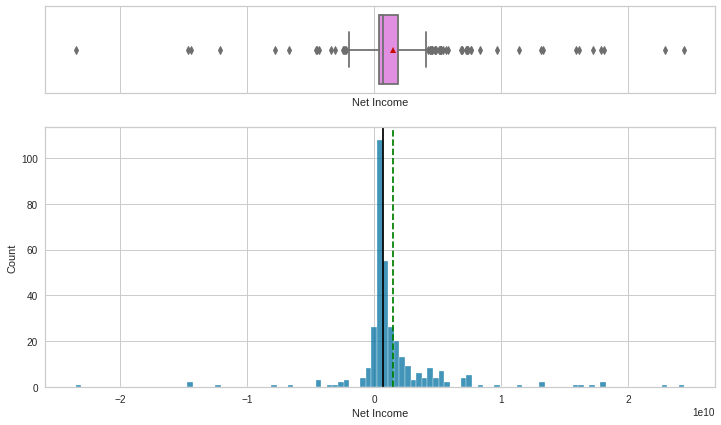

In [ ]:
histogram_boxplot(df, 'Net Income') 

**The data in Net Income returns to something approaching a normal distribution with some brutal losses balancing out the high earning outliers we have seen throughout our exploration of the data.**

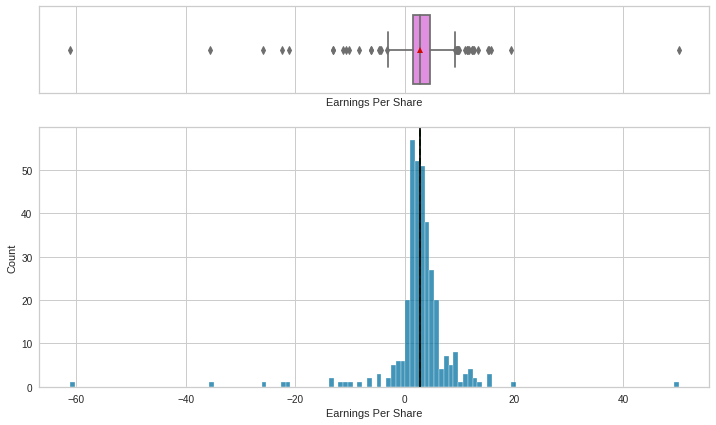

In [ ]:
histogram_boxplot(df, 'Earnings Per Share') 

**Earnings Per Share is slightly skewed left with one or two extreme losses being the only thing keeping the data from pushing that direction even further. Average looks to be around $5.**

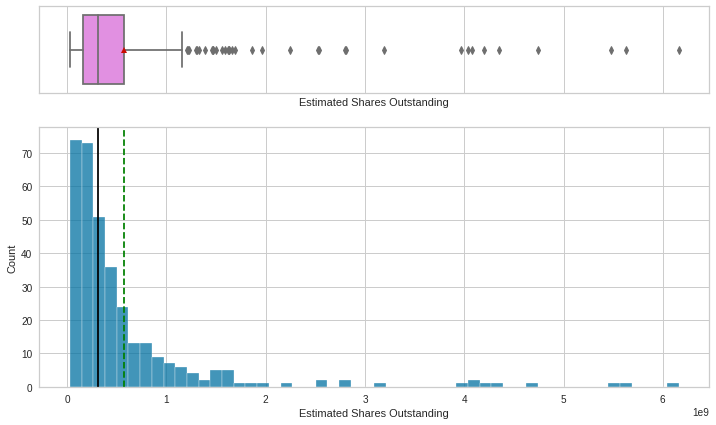

In [ ]:
histogram_boxplot(df, 'Estimated Shares Outstanding') 

**Data skews to hard right with a great many outliers. The 1e9 scale must not be lost sight of here given how dramatically it effects numbers that would otherwise be small to insignificant.**

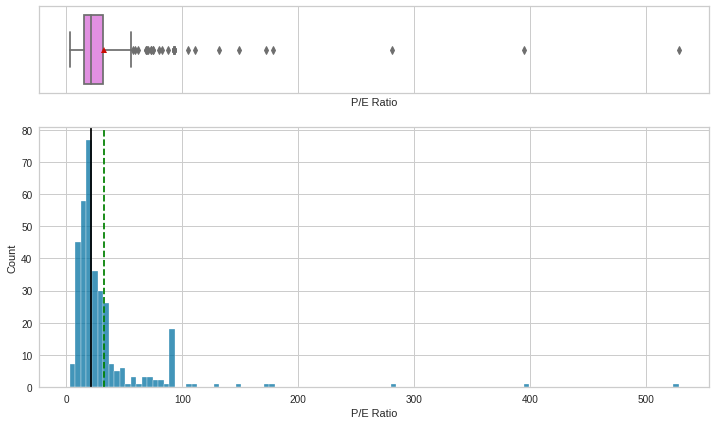

In [ ]:
histogram_boxplot(df, 'P/E Ratio')

**More right skewing data due to positive outliers. All data is positive here since it requires the provide Earnings Per Share, something not possible if the company sustains losses.**

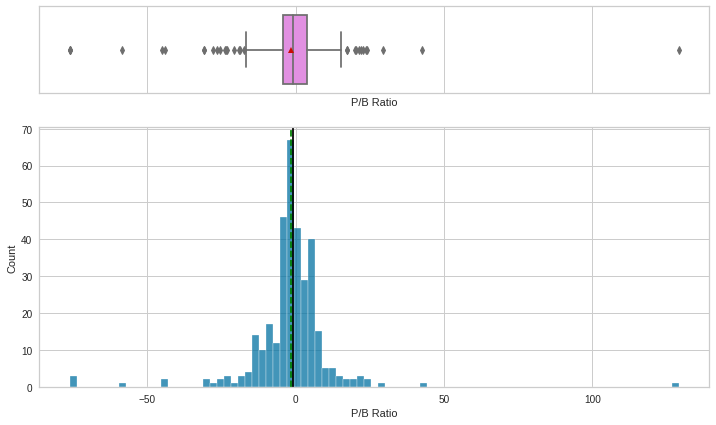

In [ ]:
histogram_boxplot(df, 'P/B Ratio')

**Unlike the P/E Ratio above, the P/B Ratio measures total assets and total liabilities meaning that the data can extend into the negatives, leading to a distribution closer to normal.**

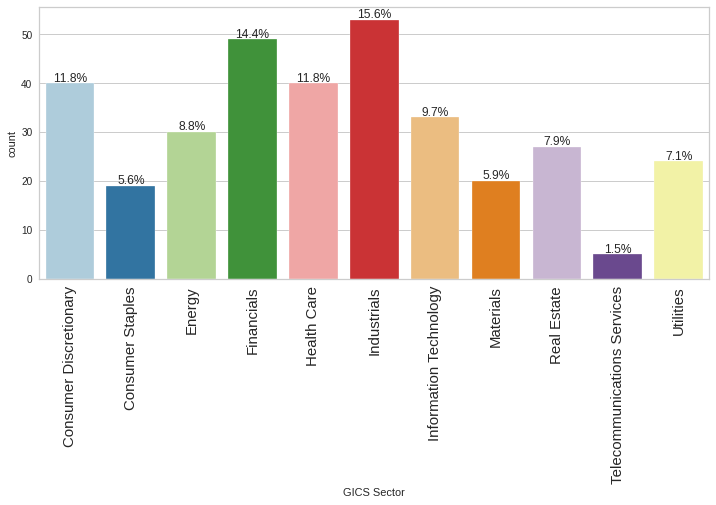

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

**30% of companies belong to Financials and Industrials making them the two largest sectors. Telecom is the smallest which is interesting given how it performed in some of the financial visualizations above.**

### **Additional Bivariate Analysis**

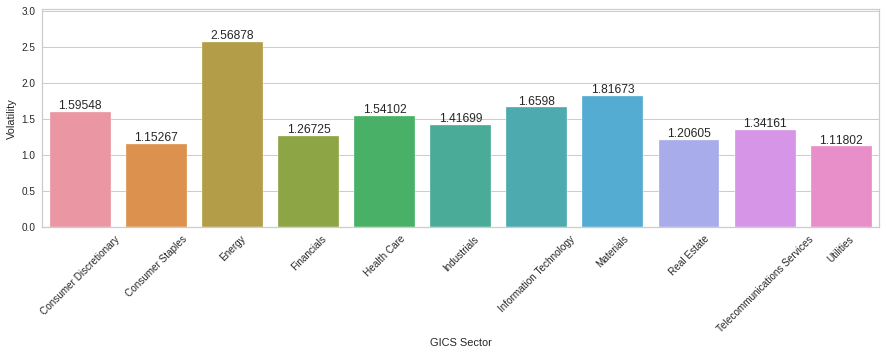

In [ ]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x='GICS Sector', y='Volatility',data=df,
                 errwidth=0)
plt.xticks(rotation=45) 

# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)

**Volatility was the name of the game for the Energy sector and it shows in the above as well as some of our other explorations. Consumer Staples and Utilities were the most stable sectors which makes sense given their consitent level of demand.**

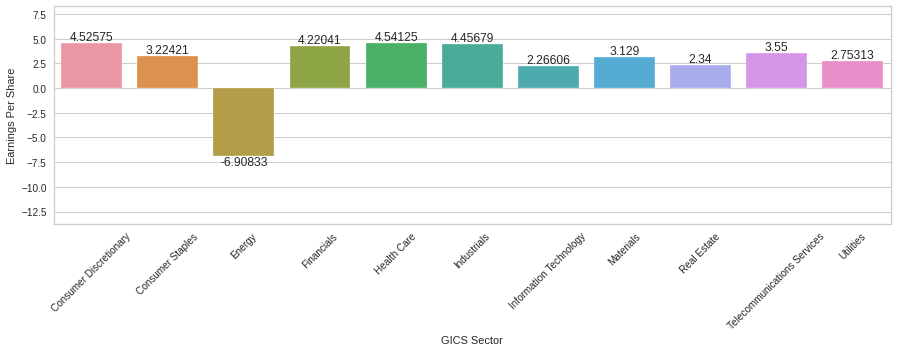

In [ ]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x='GICS Sector', y='Earnings Per Share',data=df,
                 errwidth=0)
plt.xticks(rotation=45) 

# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)

**We find that Earnings Per Share tracks along the exact same lines as the Price Increase exploration from the leading questions portion of this project. Health Care, Industrials, Financials, and Consumer Discretionary did very well. Energy performed very poorly.**

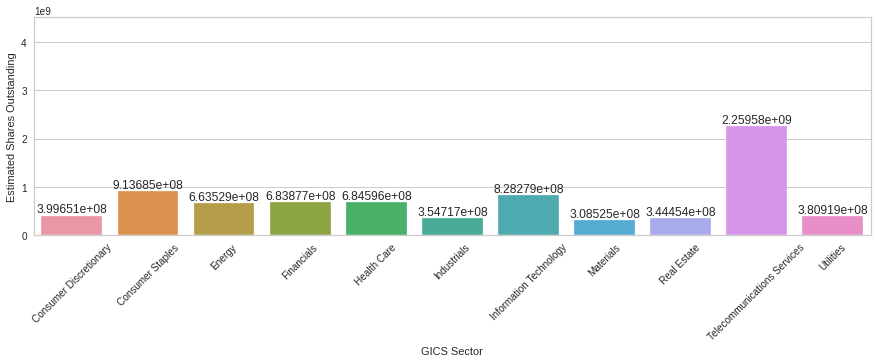

In [ ]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x='GICS Sector', y='Estimated Shares Outstanding',data=df,
                 errwidth=0)
plt.xticks(rotation=45) 

# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)

**I think the most interesting thing in this exploration is the number of shares outstanding in the Telecom sector which, as we observed earlier, contained the fewest number of companies by a very wide margin.**

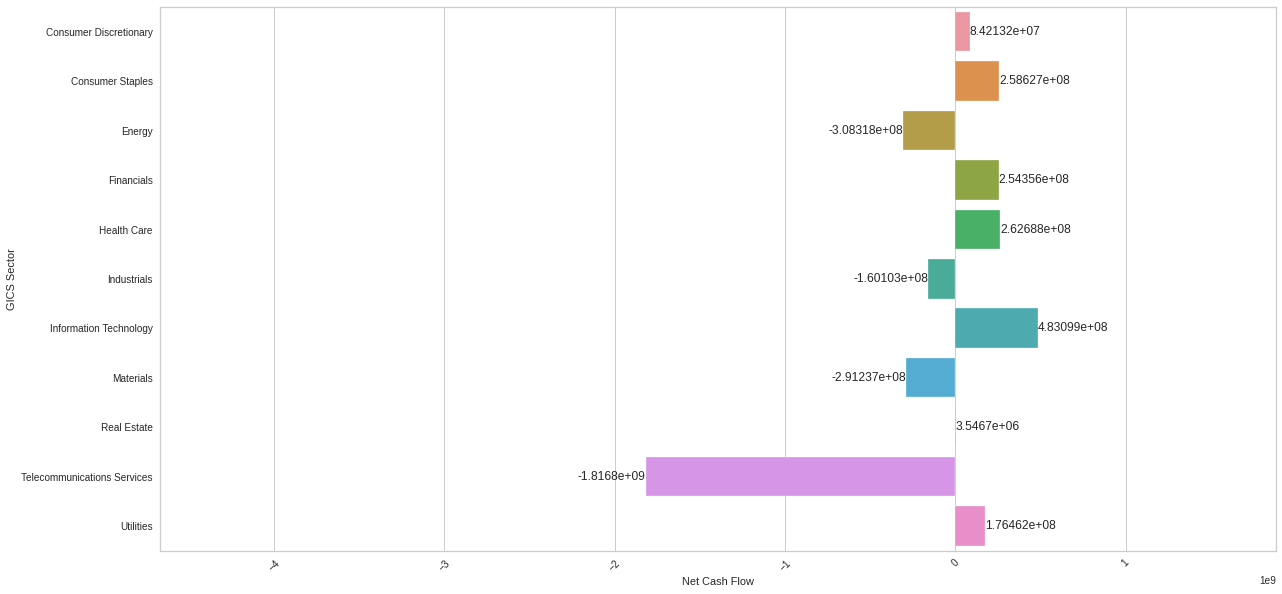

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Net Cash Flow', y='GICS Sector',data=df,
                 errwidth=0)
plt.xticks(rotation=45) 

# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)

**The obvious and most interesting data point here is the enormous negative number we see for Telecom which had performed very well in all of our previous explorations. The extreme loss in Net Cash Flow bears greater scrutiny. To a lesser extent, the same could be said for the Industrials and Materials sectors.**

## **Data Preprocessing**

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

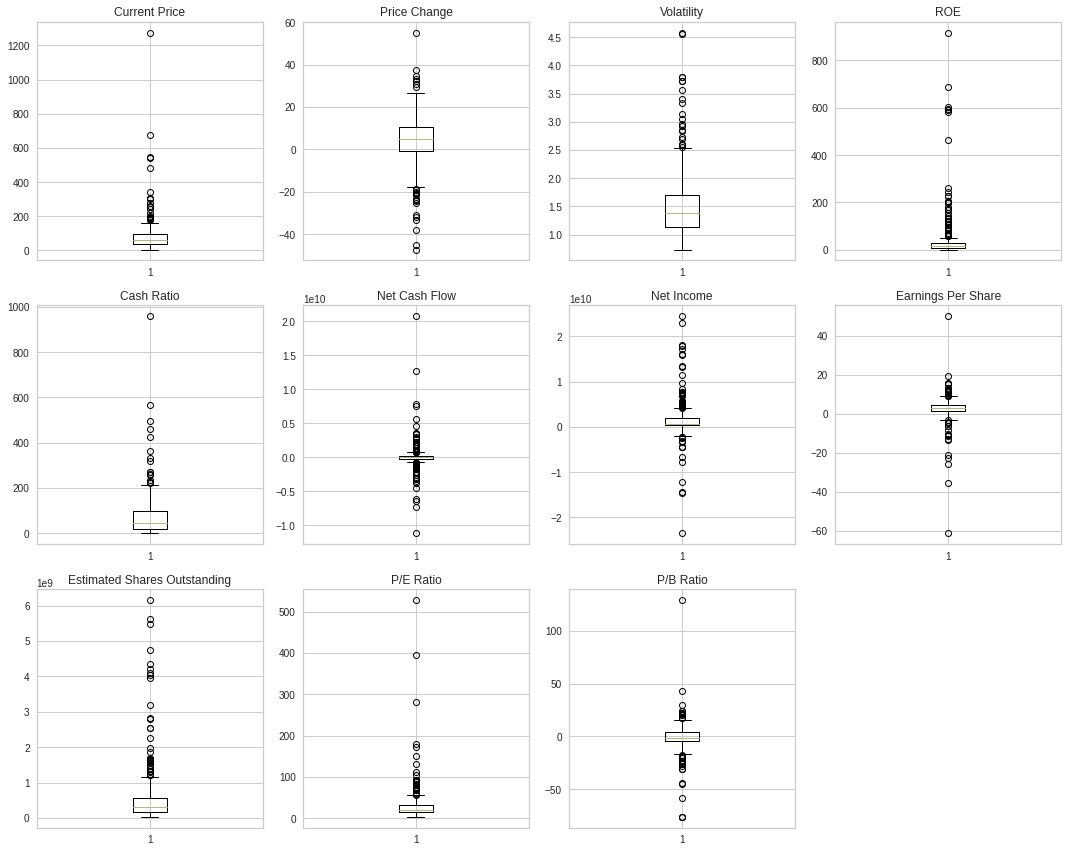

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**The outlier check is interesting here but without more information about where the points come from and the ability to the correlate them in a meaningful way that we could decipher data from noise, it is probably best that we leave them in for now.**

***Note- Missing and duplicate values have already been checked for in the discovery phase. No further feature engineering is required at this time. We are ready to move forward to the K-Means section of this project.** 

## **K-means Clustering**

###**Data Scaling**

In [ ]:
#Copying the data before scaling
dm= df.copy()

In [ ]:
#Create a list of columns with numerical variables
num_col = dm.select_dtypes(include=np.number).columns.tolist()
#Code to scale the data set before clustering
scaler = StandardScaler()
subset = dm[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
#Create a dataframe from the scaled data
subset_scaled_dm = pd.DataFrame(subset_scaled, columns=subset.columns)

**Now that we have scaled our data, let's do some EDA to have a look at the changes.**

In [ ]:
dm.head()

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
subset_scaled_dm.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


In [ ]:
#Statistical summary of the original data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [ ]:
#Statistical summary of the scaled data
subset_scaled_dm.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,7.836868e-18,1.001474,-0.779918,-0.432101,-0.216088,0.122741,12.195670
Price Change,340.0,-2.873518e-17,1.001474,-4.271357,-0.418535,0.061834,0.551963,4.251806
Volatility,340.0,-7.967483e-17,1.001474,-1.341642,-0.661838,-0.237564,0.286960,5.168258
ROE,340.0,2.873518e-17,1.001474,-0.400362,-0.309599,-0.255142,-0.130667,9.101176
Cash Ratio,340.0,-8.098097e-17,1.001474,-0.775555,-0.576194,-0.255000,0.320933,9.834905
Net Cash Flow,340.0,2.612289e-18,1.001474,-5.795489,-0.128348,-0.027497,0.058798,10.655237
Net Income,340.0,1.044916e-17,1.001474,-6.359977,-0.290285,-0.200045,0.102842,5.832629
Earnings Per Share,340.0,5.747037e-17,1.001474,-9.725729,-0.185337,0.017990,0.280224,7.192572
Estimated Shares Outstanding,340.0,-1.044916e-16,1.001474,-0.650430,-0.495119,-0.316542,-0.004630,6.609320
P/E Ratio,340.0,7.836868e-18,1.001474,-0.670162,-0.396715,-0.266300,-0.019145,11.187619


**We can observe here that the values are wildly different and much closer to each other since they have been properly scaled. This will allow us to continue on without fear of the data being artificially skewed by one particular column.**

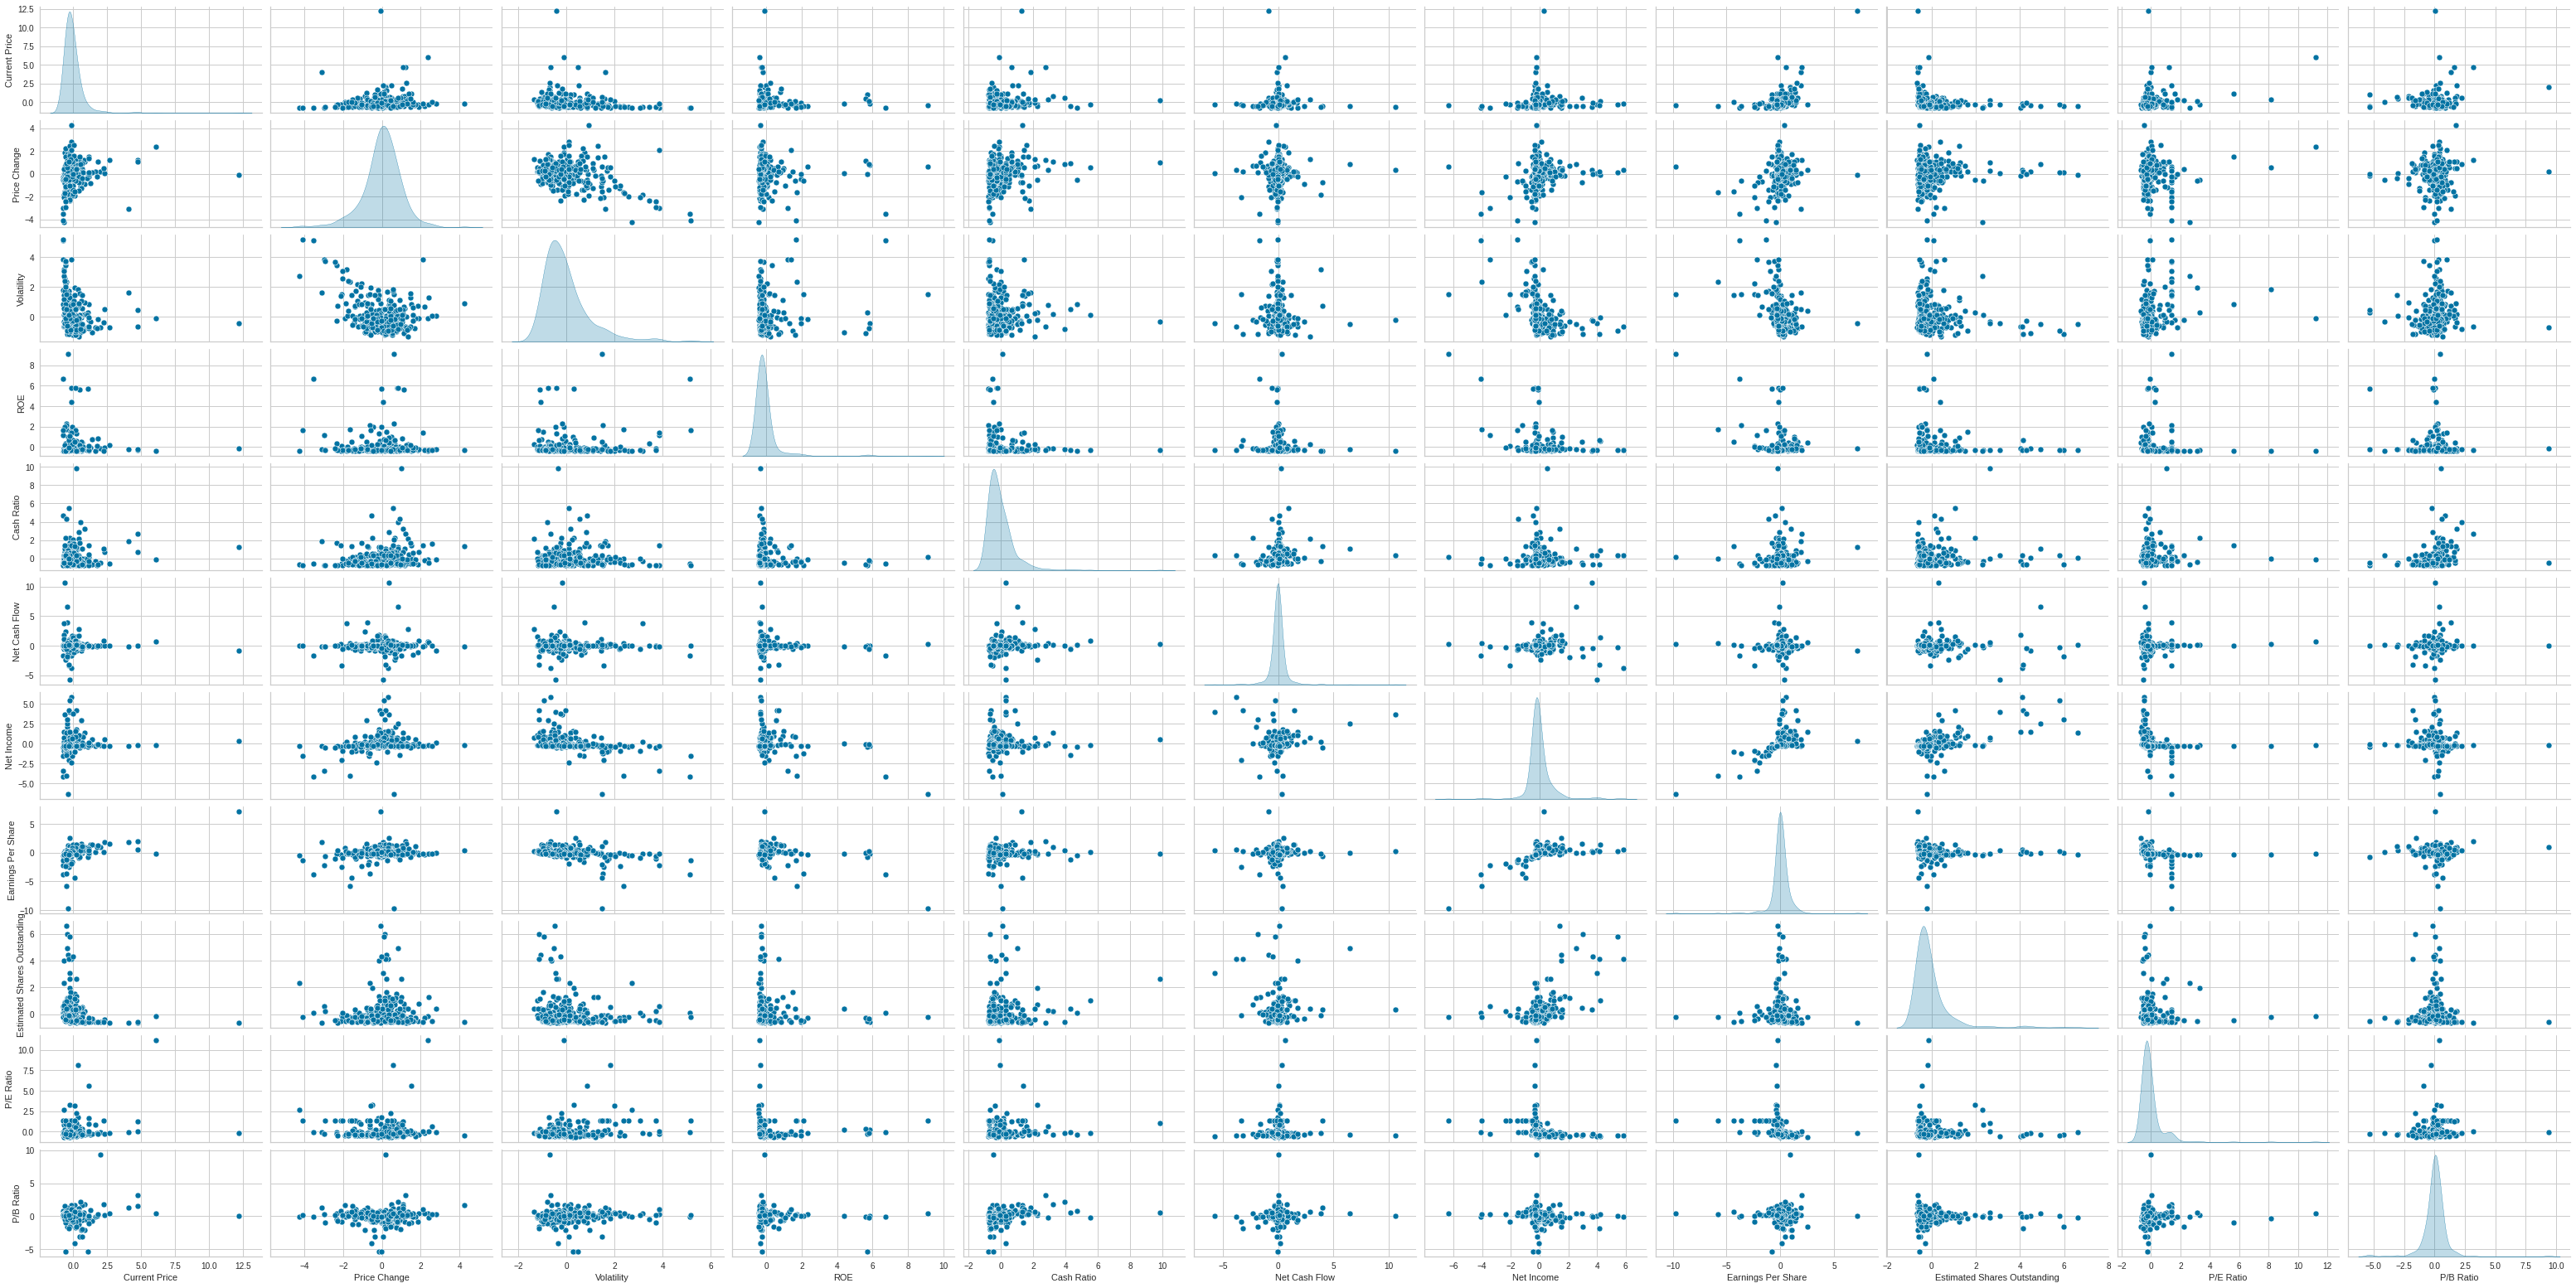

In [ ]:
#importing seaborn for statistical plots
sns.pairplot(subset_scaled_dm, height=2,aspect=2 , diag_kind='kde')

### **Elbow Plot**

In [ ]:
k_means_dm = subset_scaled_dm.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2683105560042285
Number of Clusters: 4 	Average Distortion: 2.1822426161442072
Number of Clusters: 5 	Average Distortion: 2.139205926363256
Number of Clusters: 6 	Average Distortion: 2.0737104927328227
Number of Clusters: 7 	Average Distortion: 2.02273631956027
Number of Clusters: 8 	Average Distortion: 1.9899408536298782
Number of Clusters: 9 	Average Distortion: 1.9233883300130414
Number of Clusters: 10 	Average Distortion: 1.8583081140539814
Number of Clusters: 11 	Average Distortion: 1.8150943440896545


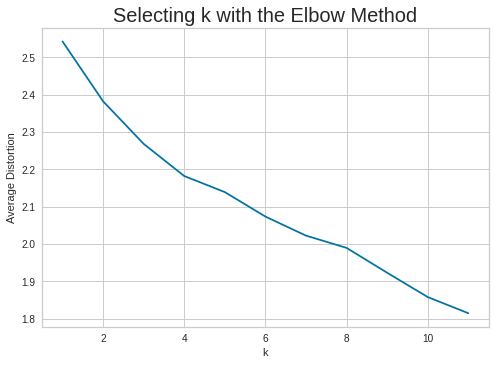

In [ ]:
clusters = range(1, 12)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(subset_scaled_dm)
    prediction = model.predict(k_means_dm)
    distortion = (
        sum(np.min(cdist(k_means_dm, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_dm.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**There is no obvious elbow which could make things difficult. K4 appears the likeliest candidate but that is subtler than we would like.**

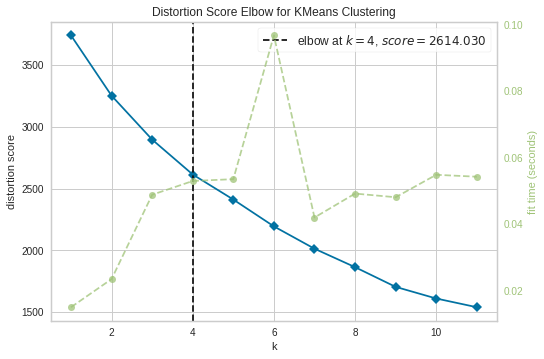

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 12), timings=True)
visualizer.fit(k_means_dm)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**This confirms our earlier observation that K4 is our winner.**

###**Silhouette Scoring**

For n_clusters = 2, the silhouette score is 0.4397)
For n_clusters = 3, the silhouette score is 0.45798)
For n_clusters = 4, the silhouette score is 0.45018)
For n_clusters = 5, the silhouette score is 0.45994)
For n_clusters = 6, the silhouette score is 0.39854)
For n_clusters = 7, the silhouette score is 0.38685)
For n_clusters = 8, the silhouette score is 0.38869)
For n_clusters = 9, the silhouette score is 0.40581)
For n_clusters = 10, the silhouette score is 0.18012)
For n_clusters = 11, the silhouette score is 0.12973)


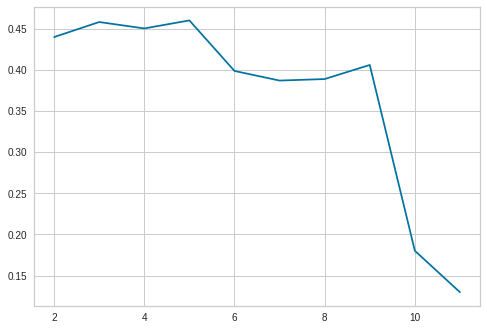

In [ ]:
sil_score = []
cluster_list = range(2, 12)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict((subset_scaled_dm))
    score = silhouette_score(k_means_dm, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, round(score,5)))

plt.plot(cluster_list, sil_score)
plt.show()

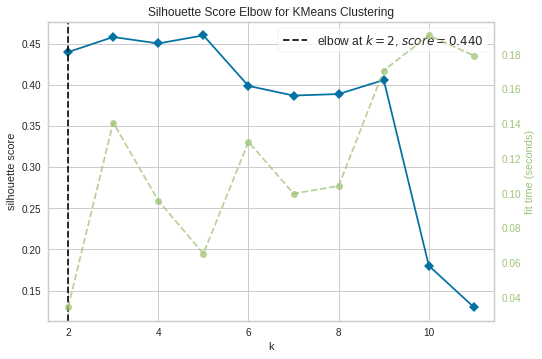

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 12), metric="silhouette", timings=True)
visualizer.fit(k_means_dm)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**We can see from the above graphs that K2, K3, K4, and K5 have higher scores than the rest. We will proceed to check their silhouettes.**

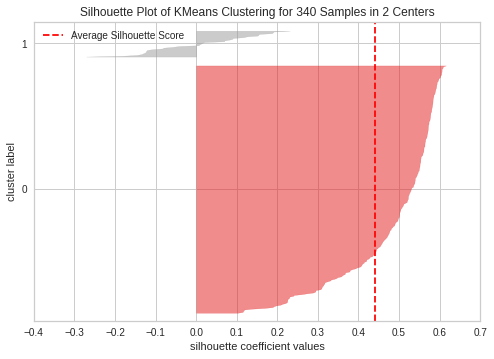

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=42))
visualizer.fit(k_means_dm)
visualizer.show()

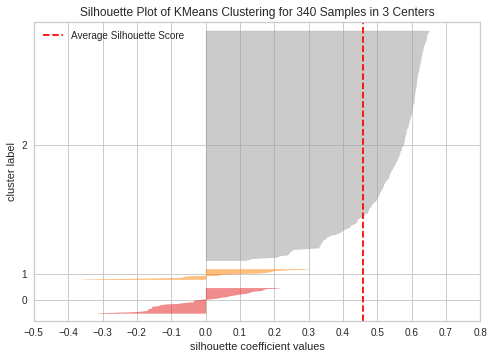

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=42))
visualizer.fit(k_means_dm)
visualizer.show()

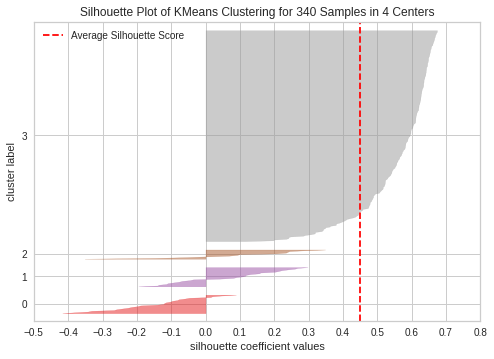

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=42))
visualizer.fit(k_means_dm)
visualizer.show()

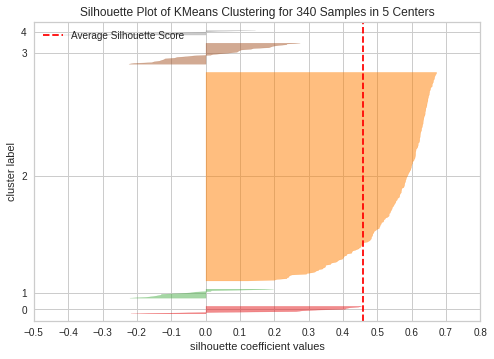

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=42))
visualizer.fit(k_means_dm)
visualizer.show()

**While all of them are far from ideal, let alone perfect, K4 appears the most consistent and so we shall proceed with it for the final model.**

In [ ]:
#Create kmeans cluster model
kmeans = KMeans(n_clusters=4, random_state=42)

#Fit model to scaled dataset
kmeans.fit(k_means_dm)

KMeans(n_clusters=4, random_state=42)

###**Cluster Profiling**

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes
k_means_dm["KM_segments"] = kmeans.labels_
dm["KM_segments"] = kmeans.labels_

In [ ]:
#group dataset by kmeans cluster labels
km_cluster_profile = dm.groupby("KM_segments").mean()

In [ ]:
#add counts for number of stocks in each cluster
km_cluster_profile["count_in_each_segment"] = (
    dm.groupby("KM_segments")["Current Price"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="skyblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,238.072932,13.508882,1.777479,25.600000,276.280000,752195440.000000,941997320.000000,5.889600,561429538.460800,90.217183,14.211965,25
1,35.165385,-16.390175,2.922214,110.961538,49.461538,-192318884.615385,-4041692307.692307,-9.849231,482610056.416923,78.934814,1.612922,26
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
3,72.470050,5.059104,1.388717,34.710145,52.938406,-18021028.985507,1471488521.739130,3.628424,429936522.010181,23.808921,-3.355600,276


In [ ]:
#Print the names of the companies in each cluster
for cl in dm["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(dm[dm["KM_segments"] == cl]["Security"].unique().to_list())
    print()

In cluster 3, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Allegion', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 'Caterpillar Inc.', 'Chubb Limit

In [ ]:
#Gather a count of each of the GICS sectors present in each cluster
#print number of stocks within each sector for all of the clusters
for k in range(0,dm['KM_segments'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(dm[dm['KM_segments']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Health Care                    9
Consumer Discretionary         6
Information Technology         6
Consumer Staples               1
Energy                         1
Real Estate                    1
Telecommunications Services    1
Financials                     0
Industrials                    0
Materials                      0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Energy                         22
Information Technology          2
Industrials                     1
Materials                       1
Consumer Discretionary          0
Consumer Staples                0
Financials                      0
Health Care                     0
Real Estate                     0
Telecommunications Services     0
Utilities                       0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:

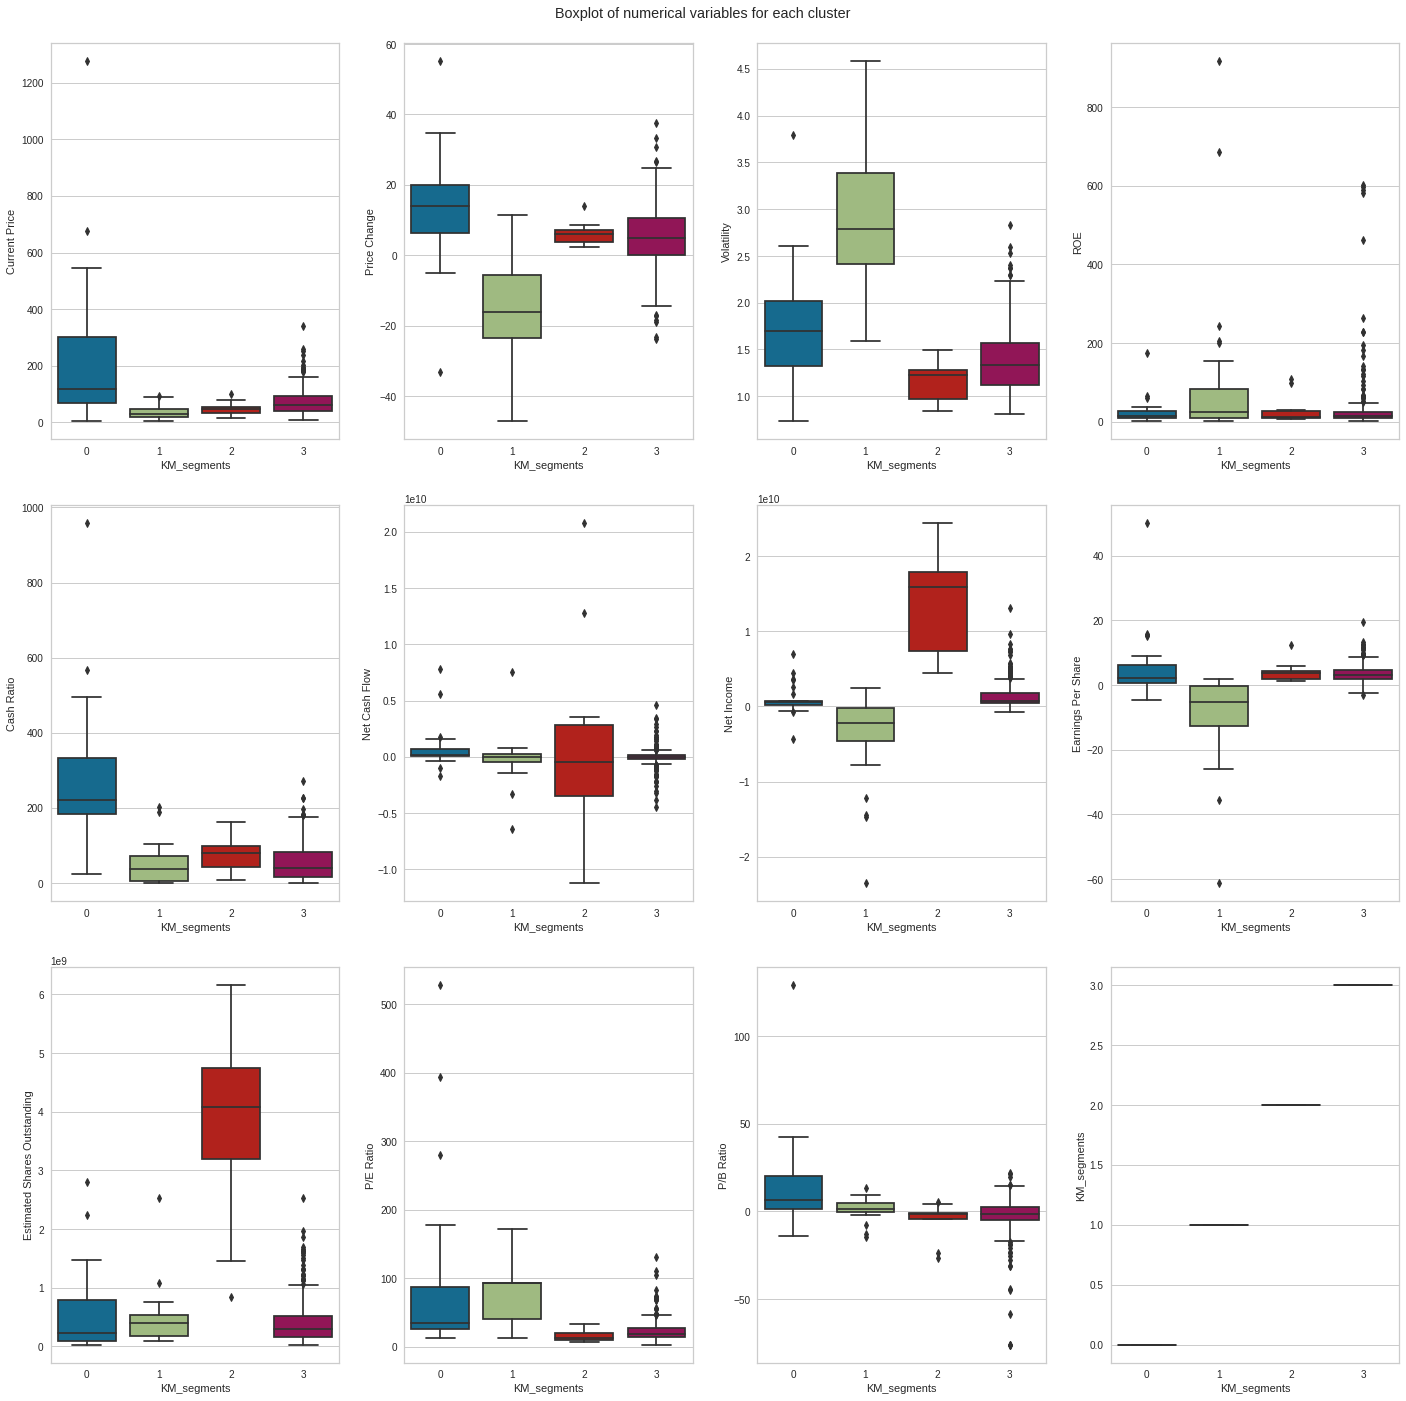

In [ ]:
#Lets generate a series of boxplots for all the numerical variables and their clusters
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = dm.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=dm, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

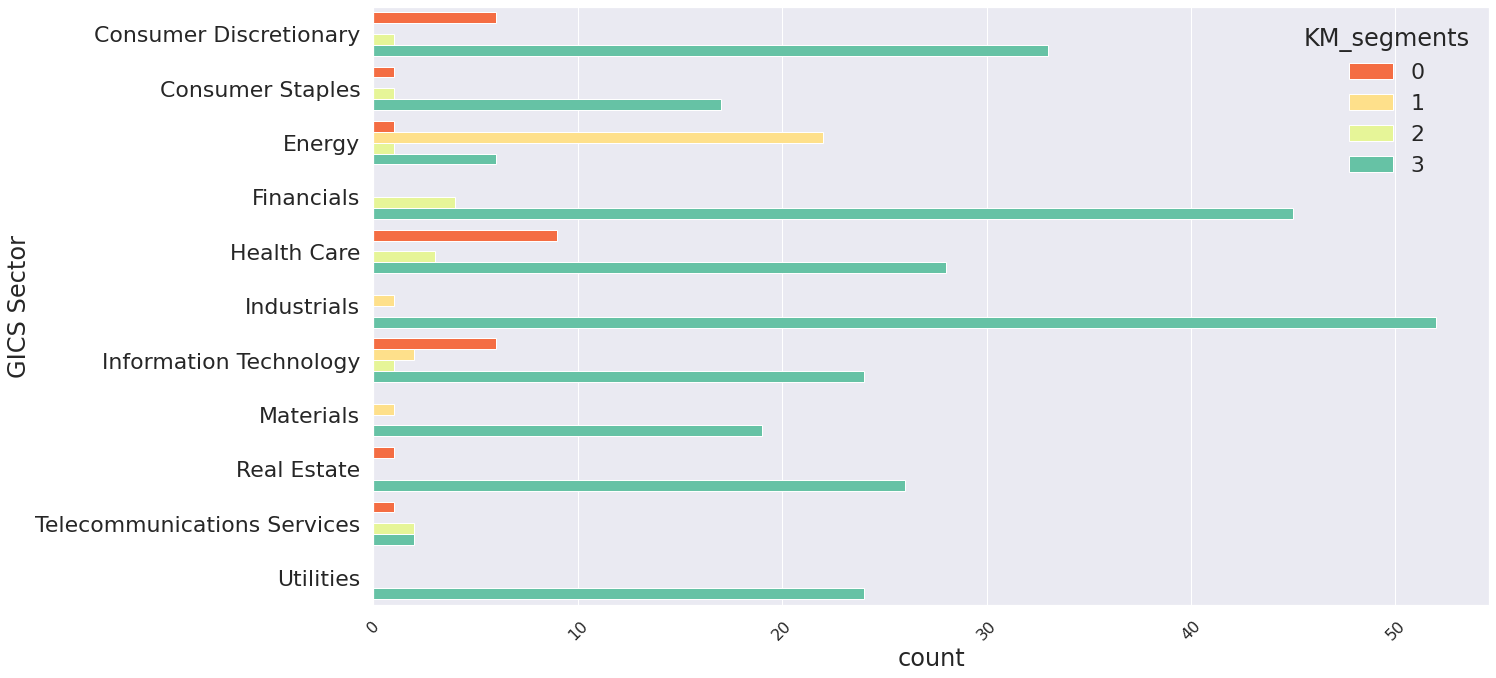

In [ ]:
#Lets plot a horizontal bar plot that shows KM Segments for each GICS sector
fig = plt.figure(figsize=(20, 11));
sns.set(font_scale = 2)
sns.countplot(data=dm, y="GICS Sector", hue="KM_segments", saturation=1, palette="Spectral");
plt.xticks(rotation=45, fontsize=16);

**<h2>Cluster Observations</h2>**

**<h3>Cluster 0</h3>** 
*   Cluster 0 contains 25 companies
*   Scores highest in Current Price, Price Change, Cash Ratio, Earnings Per Share, P/E Ratio, and P/B Ratio
*    Focused in Consumer Discretionary, Health Care, and I.T. with a little Consumer Staples, Energy, Real Estate, and Telecom for flavor
*    Cluster 0 scores the highest across the board in all the important categories. Consequently, the Price Per Share is nearly 3.3 times higher than the next highest price sector.

**<h3>Cluster 1</h3>**
*    Cluster 1 contains 26 companies
*    Scores highest in Volatility, ROE, and Estimated Shares Outstanding
*    Scores lowest in Current Price, Price Change, Cash Ratio, Net Cash Flow, Net Income, and Earnings Per Share
*   Unsurprisingly, this cluster is dominated by Energy stocks (22) and also contains 2 I.T., 1 Materials, and 1 Industrial
*  Cluster 1 is bargain basement but has contains some very interesting prospects for the high risk investor. While Energy was down during the monitoring period, it can be a very strong performer and may be so again.

**<h3>Cluster 2</h3>**
*   Cluster 2 contains 13 companies and is the smallest of our four clusters
*   It scores highest in Net Cash Flow, Net Income, and Estimated Shares Outstanding
*   It scores lowest in Volatility,  P/B Ratio, and P/E Ratio
*   It contains 4 Financials, 3 Health Care, 2 Telecom, 1 Customer Discretionary, 1 Consumer Staples, 1 Energy, and 1 I.T.
*   While Cluster 2 isn't as strong as Cluster 0, it does a lot of things well but none of them great. This might be the cluster for a more conservative, beginning investor.

**<h3>Cluster 3</h3>** 

*   Cluster 3 contains 276 companies which is more than four times as many as the other clusters combined.
*   It scores highest in no other categories beyond total stocks
*   It scores lowest in Price Change
*   It is spread around amongst the sectors given the number of available stocks in each sectors with the most in Industrials and Financials
* Cluster 3 is the ultimate jack of all trades and master of none. Its current price is second highest as is its Net Income. Cluster 3 is essentially an Index Fund.

##**Hierarchical Clustering**

In [ ]:
dh = subset_scaled_dm.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_dm, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_dm))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, round(c,4)
            )
        )
        print(" ")
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232.
 
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873.
 
Cophenetic correlation for Euclidean distance and average linkage is 0.9423.
 
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8694.
 
Cophenetic correlation for Chebyshev distance and single linkage is 0.9063.
 
Cophenetic correlation for Chebyshev distance and complete linkage is 0.5989.
 
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338.
 
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127.
 
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259.
 
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925.
 
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247.
 
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.8708.
 
Cophenetic correlation for Cityblock dist

**At .9423 Euclidean Distance and Average Linkage come out as the best overall combination scored.**

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        round(high_cophenet_corr,4), high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9423, which is obtained with Euclidean distance and average linkage.


In [ ]:
# list of linkage methods for euclidean distance metric
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_dm, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_dm))
    print("Cophenetic correlation for Euclidean distance and {} linkage is {}.".format(lm, round(c,4)))
    print(" ")
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232.
 
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873.
 
Cophenetic correlation for Euclidean distance and average linkage is 0.9423.
 
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9314.
 
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101.
 
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8694.
 


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        round(high_cophenet_corr,4), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9423, which is obtained with average linkage.


###**Dendograms**

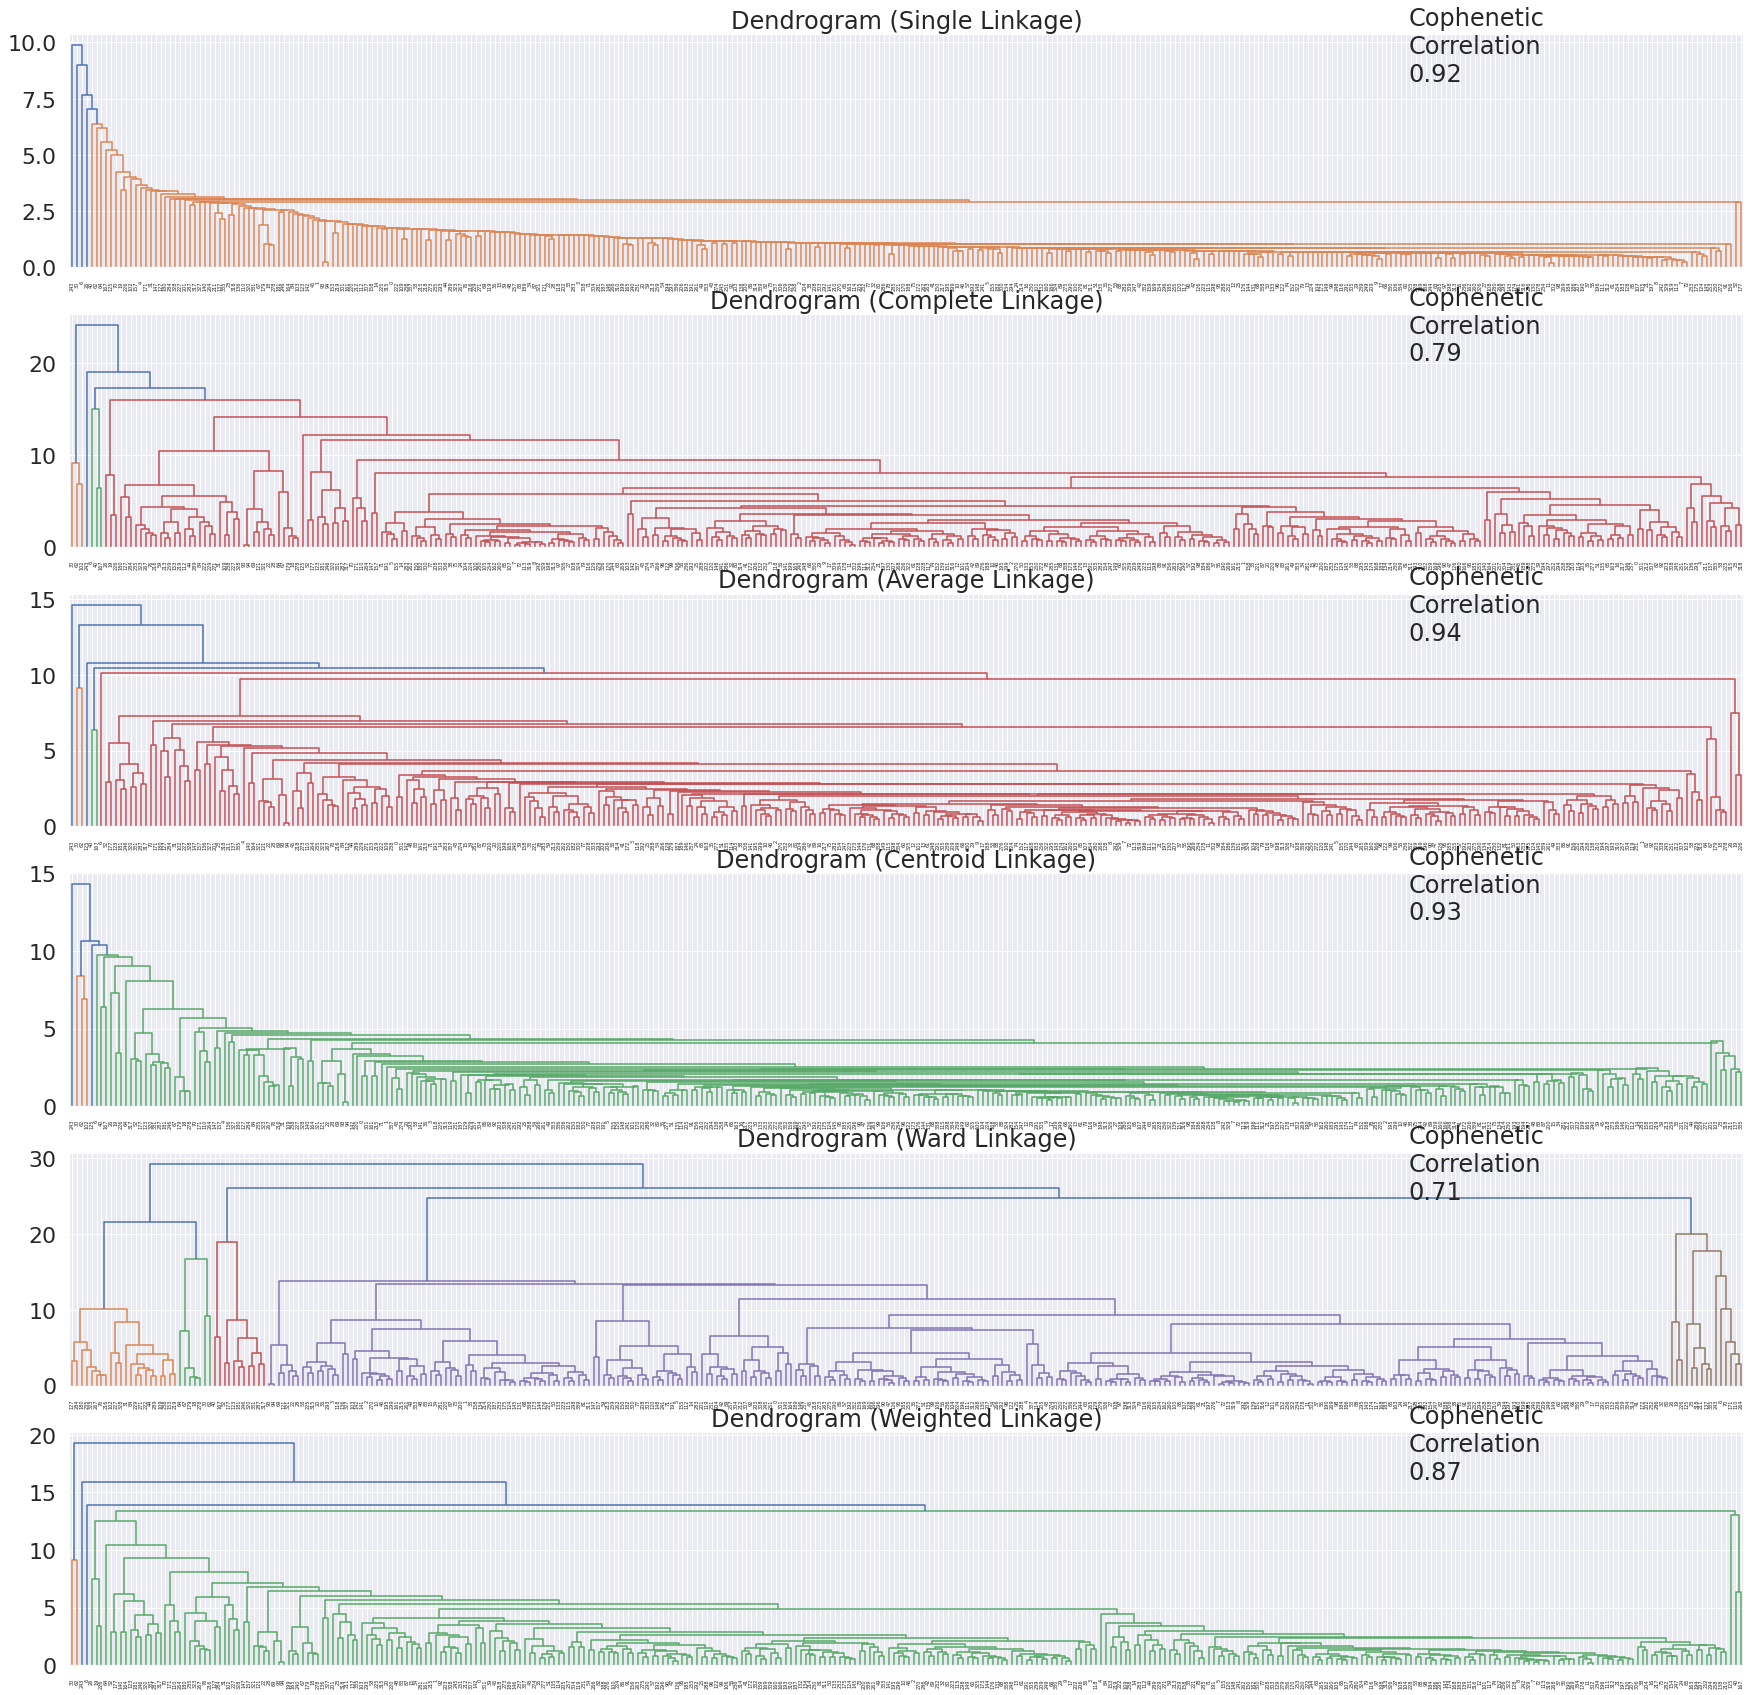

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []
# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(30, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_dm, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_dm))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    compare.append([method, coph_corr])

In [ ]:
# Comparing cophenetic correlations for different linkage methods
dfc = pd.DataFrame(compare, columns=compare_cols)
dfc = dfc.sort_values(by="Cophenetic Coefficient")
dfc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


**While ward has the lowest Cophenetic Correlation score, it does produce the best looking clusters in the dendrogram. For now, we will proceed with average linkage, euclidean affinity and four clusters.**

In [ ]:
#Lets create a agglomerative clustering model using sklearn - average linkage + euclidean
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(dh)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [ ]:
#Making another copy of the original data
dfh = df.copy()
# adding hierarchical cluster labels to the original and scaled dataframes
dh["HC_segments"] = HCmodel.labels_
dfh["HC_segments"] = HCmodel.labels_

###**Cluster Profiling**

In [ ]:
#Creating cluster labels
hc_cluster_profile = dfh.groupby("HC_segments").mean()

In [ ]:
#Grouping by cluster labels
hc_cluster_profile["count_in_each_segment"] = (
    dfh.groupby("HC_segments")["Security"].count().values
)

In [ ]:
#Printing a table with the clusters and metrics
hc_cluster_profile.style.highlight_max(color="skyblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,67104693.452381,1607391086.309524,2.905640,572317821.413095,32.325679,-1.762402,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1


**Segment count show extremely low split. This does not look promising so far as a final model.**

In [ ]:
# Lets see the companies in each cluster
for cl in dfh["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(dfh[dfh["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Yahoo Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 336
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 2, the following companies are present:
['Apache Corporation', 'Chesapeake Energy']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 3, the following companies are present:
['Facebook']
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are pr

In [ ]:
# print the number of stocks in each GICS sector for each cluster
for k in range(0,dfh['HC_segments'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(dfh[dfh['HC_segments']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         39
Information Technology         32
Energy                         28
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Consumer Discretionary         1
Consumer Staples               0
Energy                         0
Financials                     0
Health Care                    0
Industrials                    0
Information Technology         0
Materials                      0
Real Estate                    0
Telecommunications Services    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:

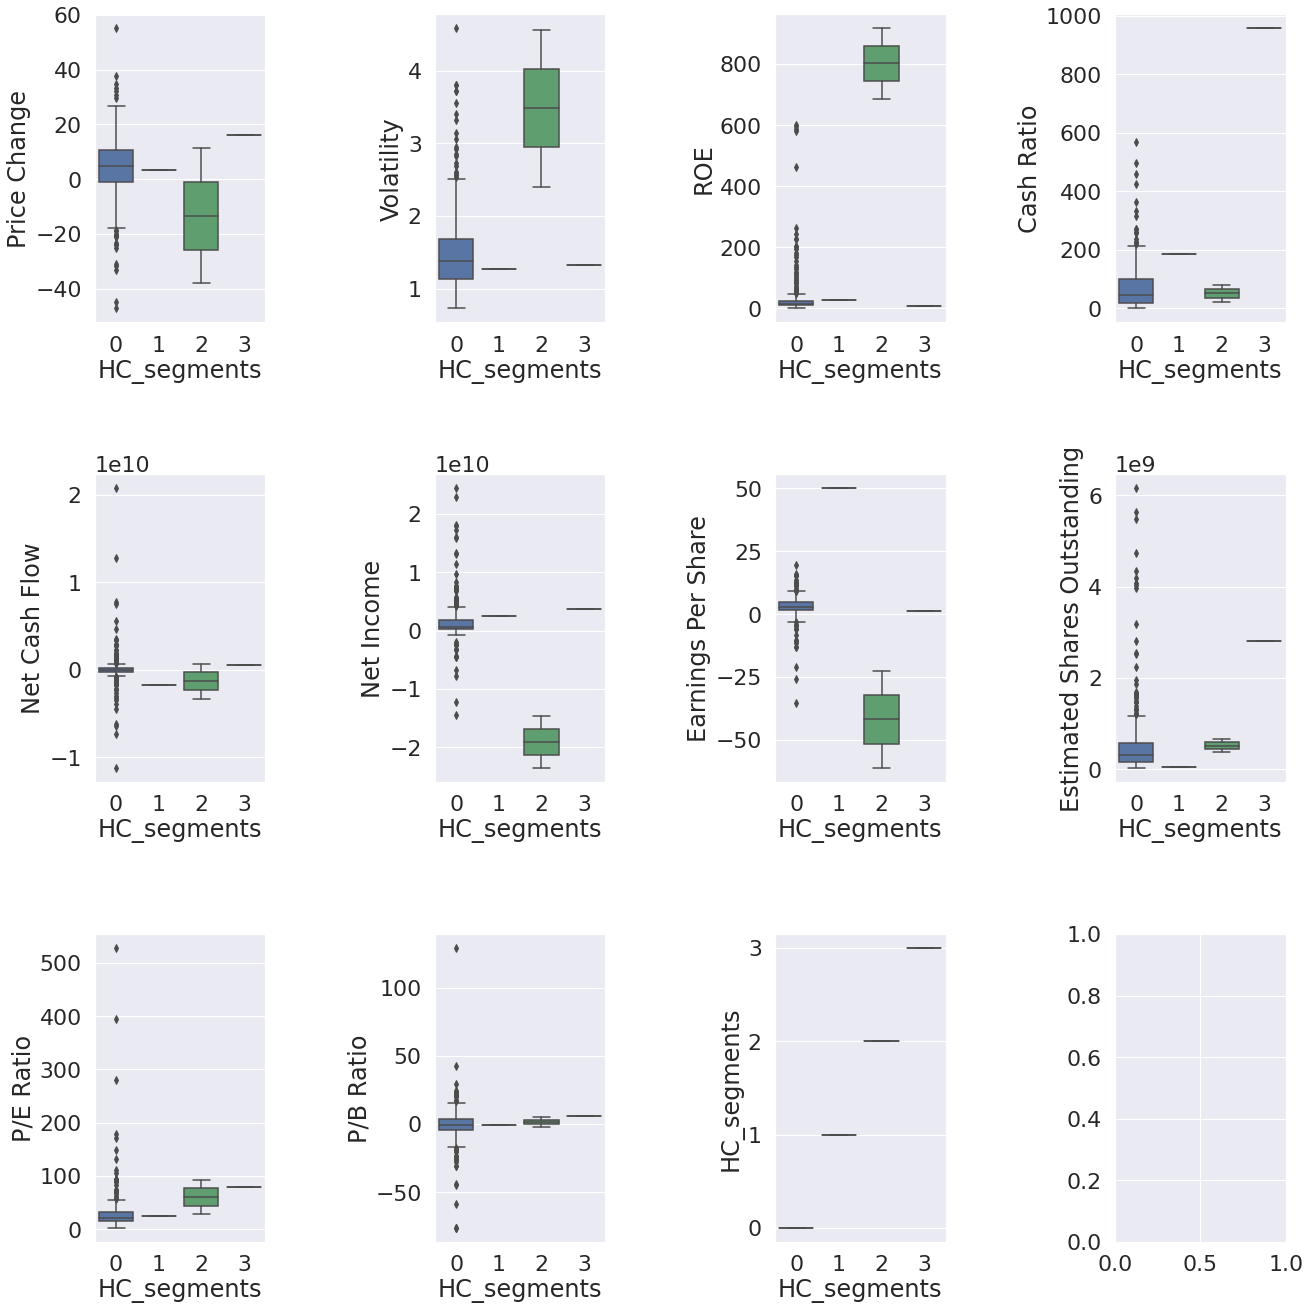

In [ ]:
#Creating box plots for each variable and the respective cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=dfh,
                y=dfh.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

**As I feared, the clusters for average are not great. Two of the four only have one company in them. This will not do in terms of satisfying the business case. If high cophrenic count is not the best approach, we can go the opposite way and try ward as the clusters seemed very well formed.**

In [ ]:
#Lets try using the ward linkage
HCmodelW = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodelW.fit(dh)

AgglomerativeClustering(n_clusters=4)

In [ ]:
#One more copy of the data
dfw = df.copy()
# adding hierarchical cluster labels to the original and scaled dataframes
dh["HC_segments"] = HCmodelW.labels_
dfw["HC_segments"] = HCmodelW.labels_

In [ ]:
hc_cluster_profilew = dfw.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profilew["count_in_each_segment"] = (
    dfw.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profilew.style.highlight_max(color="skyblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275


**Clearly, this is a much better split. We still see one cluster with 275 companies in it but the other clusters have a nice mix and variability. This is actually pretty close to what we saw in the K-Means model.**

In [ ]:
#Lets see the companies in each cluster
for cl in dfw["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(dfw[dfw["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 275
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are present:
['Adobe Systems Inc', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Applied Materials Inc', 'Amgen Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 27
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 0, the following companies are present:
['Allegion', 'Apache Corporation', 'Anadark

In [ ]:
#Lets get a count of securities from each GICS sector 
dfw.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Health Care                     0
             Industrials                     1
             Information Technology          1
             Materials                       1
             Real Estate                     0
             Telecommunications Services     0
             Utilities                       0
1            Consumer Discretionary          5
             Consumer Staples                1
             Energy                          0
             Financials                      1
             Health Care                     8
             Industrials                     0
             Information Technology          9
             Materials                       1
             Real Estate                     1
             Teleco

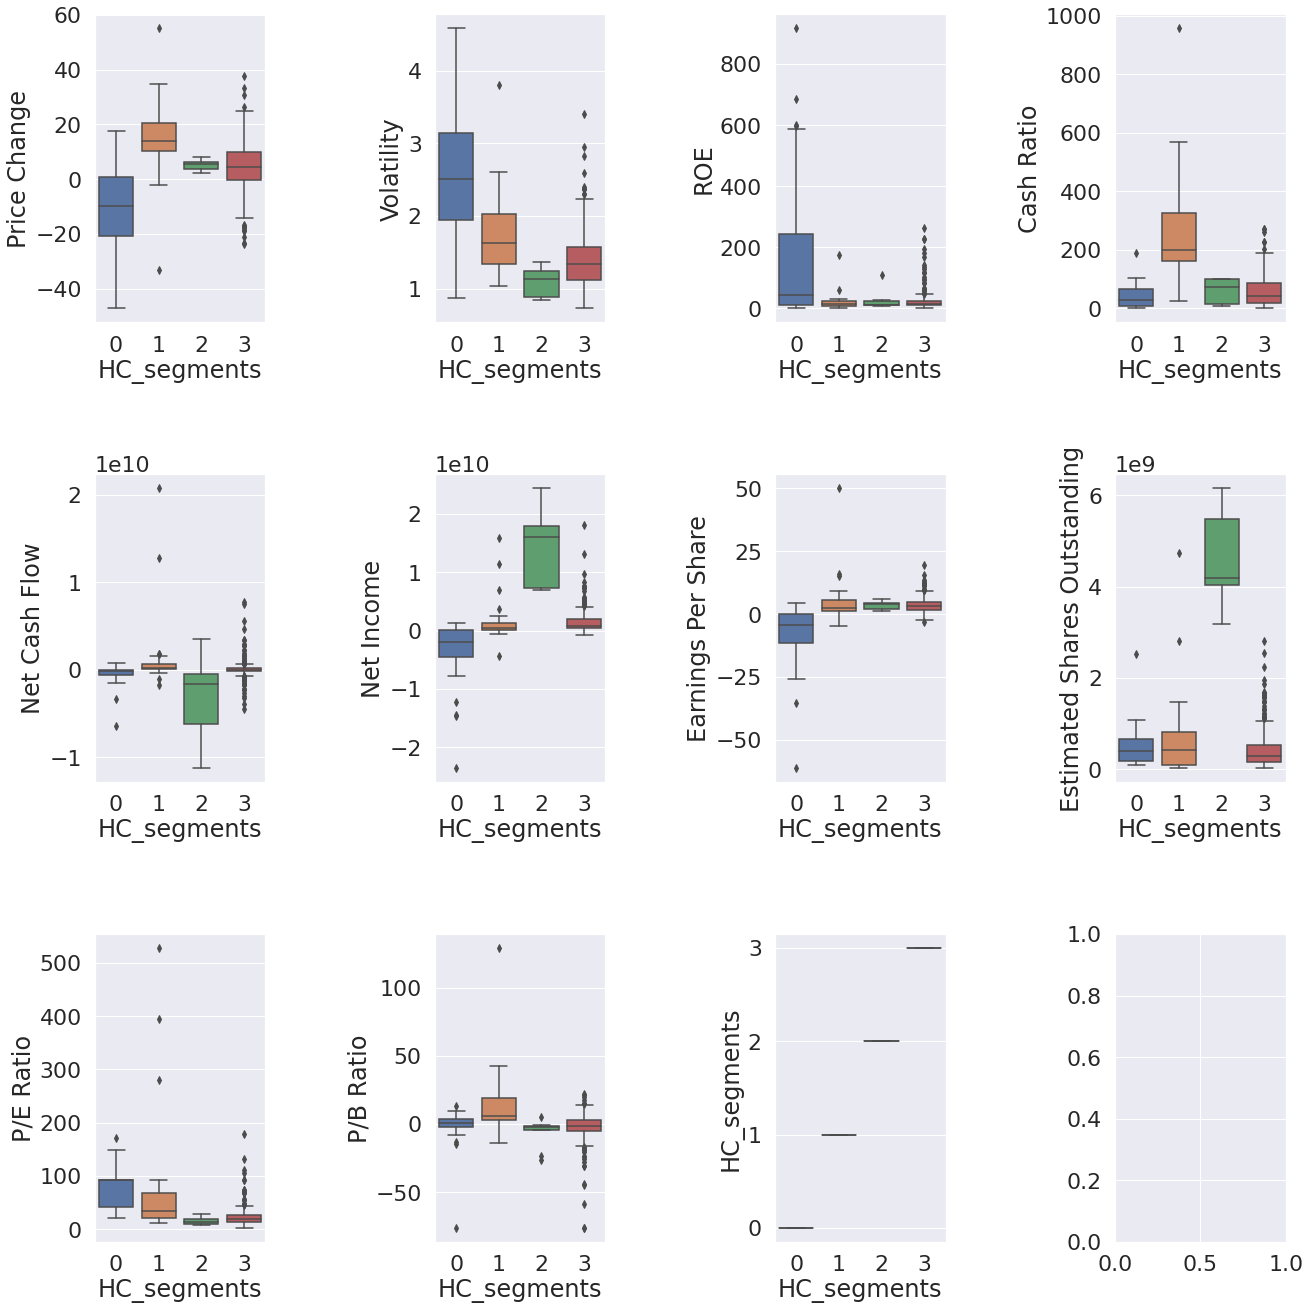

In [ ]:
#Creating box plots for each variable and the respective cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=dfw,
                y=dfw.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

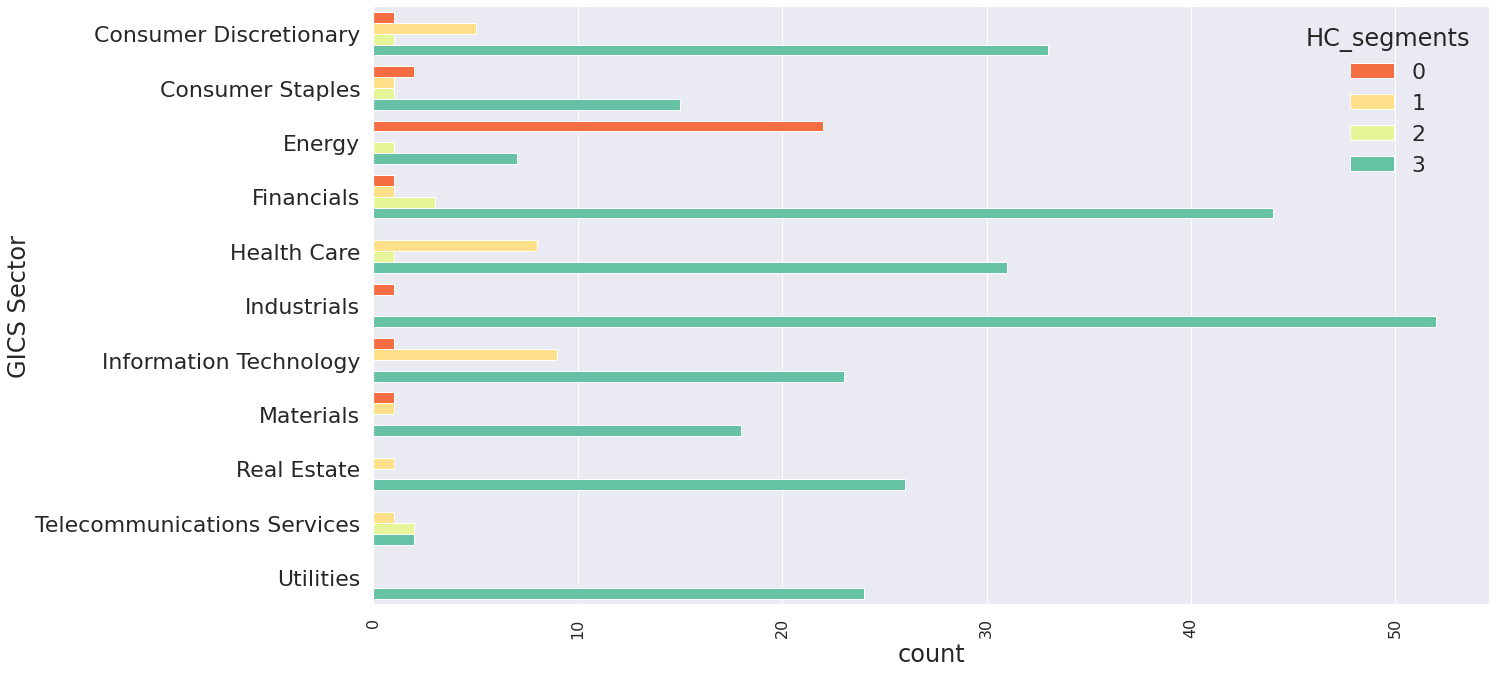

In [ ]:
#Lets plot a horizontal bar plot that shows HC Segments for each GICS sector
fig = plt.figure(figsize=(20, 11));
sns.set(font_scale = 2)
sns.countplot(data=dfw, y="GICS Sector", hue="HC_segments", saturation=1, palette="Spectral");
plt.xticks(rotation=90, fontsize=16);

**<h2>Cluster Observations</h2>**

**<h3>Cluster 0</h3>** 
*   Cluster 0 contains 29 companies
*   Scores highest in Volatility, and ROE
*   Scores lowest in Price Change, Cash Ratio, Net Cash Flow, Net Income, and Earnings Per Share
*    Focused in Energy with 22 companiies of that sector represented and one or two others in every sector but Health Care, its only zero
*    Cluster 0's high volatility scores are no surprise given its focus on the Energy sector. It feels like this sector could bounce back given its high ROE. Compares well with Cluster 1 in our K-Means work.

**<h3>Cluster 1</h3>**
*    Cluster 1 contains 27 companies
*    Scores highest in Current Price, Price Change, Cash Ratio, Net Cash Flow, Earnings Per Share, P/E Ratio, and P/B Ratio
*    Scores lowest in ROE
*    This cluster is split between Health Care, I.T., Consumer Discretionary, and a single Materials, Real Estate, and Telecom respectively
*  Cluster 1's is nearly three times as expensive as the second highest price cluster (Cluster 3) and carries an equal advantage in Price Change. This would appear to be our Blue Chip segment and compares well to Cluster 0 from out K-Means work.

**<h3>Cluster 2</h3>**
*   Cluster 2 contains 9 companies and is the smallest of our four clusters just like it was in the K-Means clustering
*   It scores highest in Net Income, and Estimated Shares Outstanding
*   It scores lowest in Current Price, Volatility, P/E Ratio, and P/B Ratio
*   It contains 3 Financials, 2 Telecom, 1 Customer Discretionary, 1 Consumer Staples, 1 Energy, and 1 Heath Care.
*   While Cluster 2 does a lot of things well but none of them great. This might be the cluster for a more conservative, beginning investor. It compares well to Cluster 2 in our K-Means work.

**<h3>Cluster 3</h3>** 

*   Cluster 3 contains 275 companies which is more than four times as many as the other clusters combined.
*   It scores highest in no other categories beyond total stocks
*   It scores lowest in Price Change
*   It is spread around amongst the sectors given the number of available stocks in each sectors with the most in Industrials and Financials
* Cluster 3 is the ultimate jack of all trades and master of none. Its current price is second highest as it its Net Income. Cluster 3 is essentially an Index Fund. It is nearly a mirror of what we saw in Cluster 3 of our K-Means work.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**I found my results to be surprisingly similar once I made the adjustment to move away from average linkage and into ward for my Hierarchical clustering. Neither was able to produce even size clusters and it was difficult in both methods to determine the ideal number of clusters. In K-Means Clustering, this was because the elbow was not obviously conclusive. In the Hierarchical Clustering, it was because the Cophenetic Correlations were misleading. Of course, that may have been a simple product of the data itself and the fact that both results were so comparable enforces my own thinking that there is something to that. Execution time was not really a factor as both clustering methods performed well. As I discussed in my Cluster observations above, there seemed to be fairly direct correlations between K-Means Cluster 0 and Hierarchical Cluster 1, K-Means Cluster 2 and Hierarchical Cluster 2, and K-Means Cluster 3 and Hierarchical Cluster 3.**

## Actionable Insights and Recommendations


**The next person who successfully predicts the stock market will be as rich as Midas but that is not what we are trying to do here. Whle data going back further than 13 weeks would be very helpful, I believe the clustering performed in this project divides up the data that Trade&Ahead provided us with very nicely and delivers a working model of separate investment packages that might appeal to four different investor types.**

*   **K-Means Cluster 3 (Hierarchical Cluster 3) might appeal to the slow and steady investor.**
*   **K-Means Cluster 2 (Hierarchical Cluster 2) might appeal to investors who are just starting out and looking to get comfortable.**
*   **K-Means Cluster 1 (Hierarchical Cluster 0) might appeal to the gambler investor who is looking the for high risk and potentcially higher rewards.**
*   **K-Means Cluster 0 (Hierarchical Cluster 1) might appeal to the investor who is already well along their wealth journey and can afford to focus more on blue-chip investment assets.**

**The next step for Trade&Ahead would be to provide us with customer and potential customer lead data so that we could begin creating a second set of models to help them best fit the client to the investment package.**